## INSTRUÇÃO PRÁTICA - IP-P009
## Revisao e consolidaçao do conteúdo de __Pandas__ avançado.
Dados de estações metereologicas de Montes Claros dos anos de 2003, 2013 e 2023, diponiveis em: [Instituto Nacional de Meteorologia](https://portal.inmet.gov.br/dadoshistoricos). 

### Exercicio 1: Tratando series temporais por tempos
1. Carregando dados utilizando `DatetimeIndex`

In [10]:
import pandas as pd
    
Mc_2003 = pd.read_csv('dataset/montesclaros2003.CSV', encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
Mc_2013 = pd.read_csv('dataset/montesclaros2013.CSV', encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
Mc_2023 = pd.read_csv('dataset/montesclaros2023.CSV', encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)


 2- Removendo coluna extra 

In [11]:
Mc_2003.drop(columns=['Unnamed: 19'], inplace=True)
Mc_2023.drop(columns=['Unnamed: 19'], inplace=True)

3- pegando lista de nomes de colunas de cada dataframe

In [12]:
# pegando lista de nomes de colunas de cada dataframe
colunas_2003 = Mc_2003.columns.values.tolist() 
colunas_2013 = Mc_2013.columns.values.tolist()
colunas_2023 = Mc_2023.columns.values.tolist()

# renomeando colunas diferentes para o nome da coluna do dataframe de 2003
for c_2003, c_2013, c_2023 in zip(colunas_2003, colunas_2013, colunas_2023):
    if c_2003 != c_2013 or c_2003 != c_2023:
        Mc_2013.rename(columns={c_2013: c_2003}, inplace=True)
        Mc_2023.rename(columns={c_2023: c_2003}, inplace=True)
        

# concatenando os dataframes
Mc = pd.concat([Mc_2003, Mc_2013, Mc_2023], ignore_index=True)

4-  Criando DateTimeIndex

In [13]:
# tratando coluna hora
mask_utc = Mc['HORA (UTC)'].str.contains('UTC')  # mascara para pegar apenas os dados com UTC

# trantando dados utc
dados_utc = Mc.loc[mask_utc, 'HORA (UTC)']
dados_utc = dados_utc.replace(' UTC', '', regex=True) # removendo UTC
dados_utc = dados_utc.str[0:2] + ':00' # pegando apenas a hora

# colocando os dados tratados no dataframe
Mc.loc[mask_utc, 'HORA (UTC)'] = dados_utc.values

In [14]:
# tratando coluna data
Mc['DATA (YYYY-MM-DD)'] = Mc['DATA (YYYY-MM-DD)'].str.replace('/', '-')

In [15]:
# criando DateTimeIndex a partir da coluna DATA (YYYY-MM-DD) e HORA (UTC)
Mc_index = pd.to_datetime(Mc['DATA (YYYY-MM-DD)'] + ' ' + Mc['HORA (UTC)'])

# removendo as colunas originais DATA (YYYY-MM-DD) e HORA (UTC)
Mc.drop(['DATA (YYYY-MM-DD)', 'HORA (UTC)'], axis=1, inplace=True)

# Define a coluna DATA HORA como índice
Mc.set_index(Mc_index, inplace=True)

 5- definindo multiindex para as colunas

In [16]:
# agrupando parametros de medição
nivel_1 = ['precipitacao'] + ['pressao']*3 + ['radiacao'] + ['temperatura']*6 + ['umidade']*3 + ['velocidade do vento']*3
nivel_2 = colunas_2003[2:]

# definindo multiindex para as colunas
index_col = pd.MultiIndex.from_arrays([nivel_1, nivel_2], names=['medicao', 'tipo'])

Mc_index.columns = index_col

6-  Transformando colunas de string para float

In [17]:
# substiduindo valores , por .
Mc.replace(',', '.', regex=True, inplace=True)

# convertendo para float
Mc = Mc.astype('float64')

6- ##### tirando do todos os possiveis valores nulos

In [18]:
# tirando do todos os possiveis valores nulos
Mc.replace(['-9999', -9999, -9999.0, '-9999.0'], value= None, inplace=True)

# preenchendo valores nulos
Mc.bfill(inplace=True)

### 7- Informaçoes DataFrame

In [32]:
print(Mc.head())



                     PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
2003-01-01 00:00:00                               0.0   
2003-01-01 01:00:00                               0.0   
2003-01-01 02:00:00                               0.0   
2003-01-01 03:00:00                               0.0   
2003-01-01 04:00:00                               0.0   

                     PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
2003-01-01 00:00:00                                              940.8       
2003-01-01 01:00:00                                              941.2       
2003-01-01 02:00:00                                              940.9       
2003-01-01 03:00:00                                              940.4       
2003-01-01 04:00:00                                              940.0       

                     PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
2003-01-01 00:00:00                                            940.8   
2003-01-01 01:00:00                         

In [31]:
print(Mc.columns)

Index(['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (KJ/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)', 'Unnamed: 19'],
      dtype='object')


In [21]:
Mc.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
count,26280.000000,26280.000000,26280.000000,26280.000000,26279.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,0.0
mean,0.098105,941.791492,942.055502,941.525746,4036.163343,24.061716,14.356408,24.816553,23.330320,14.866971,13.851678,61.667694,55.731202,58.703539,148.987291,4.487588,1.895327,NaN
std,1.120071,3.047777,3.029915,3.059376,8812.200320,4.787066,3.982866,4.875069,4.692147,3.936285,4.038828,20.034598,20.174930,20.229970,100.768813,2.502573,1.312639,NaN
min,0.000000,931.300000,931.500000,931.000000,0.000000,9.000000,-1.800000,10.400000,8.600000,0.800000,-3.800000,11.000000,8.000000,10.000000,1.000000,0.000000,0.000000,NaN
25%,0.000000,939.600000,939.900000,939.400000,94.700000,20.700000,11.600000,21.300000,20.200000,12.100000,11.100000,46.000000,39.000000,43.000000,63.000000,2.300000,0.900000,NaN
50%,0.000000,941.600000,941.900000,941.400000,758.000000,23.700000,14.600000,24.500000,23.000000,15.100000,14.100000,63.000000,56.000000,59.000000,117.000000,4.100000,1.700000,NaN
75%,0.000000,943.900000,944.100000,943.600000,2563.250000,27.500000,17.500000,28.400000,26.700000,18.000000,17.000000,78.000000,72.000000,75.000000,237.000000,6.200000,2.700000,NaN
max,52.400000,952.100000,952.300000,952.000000,47499.000000,39.600000,23.400000,40.500000,38.700000,23.800000,22.500000,98.000000,97.000000,98.000000,360.000000,20.500000,9.400000,NaN


coluna Daframe

### Tarefa 1: Evolução das temperaturas médias e acumulado de precipitações ao longo de três anos

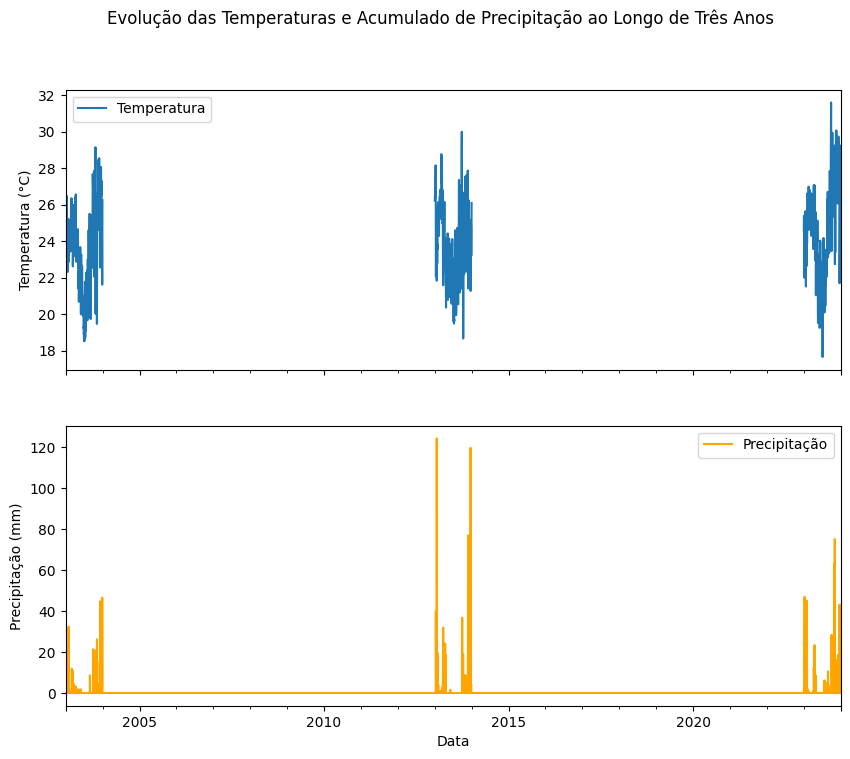

In [24]:
import pandas as pd
import matplotlib.pyplot as plt



fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

Mc['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].resample('D').mean().plot(ax=axes[0], label='Temperatura')
Mc['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].resample('D').sum().plot(ax=axes[1], label='Precipitação', color='orange')

axes[0].set_ylabel('Temperatura (°C)')
axes[1].set_ylabel('Precipitação (mm)')
axes[1].set_xlabel('Data')
axes[0].legend()
axes[1].legend()
plt.suptitle('Evolução das Temperaturas e Acumulado de Precipitação ao Longo de Três Anos')
plt.show()


#### Tarefa 2: Acumulado de precipitações em junho ao longo de três anos

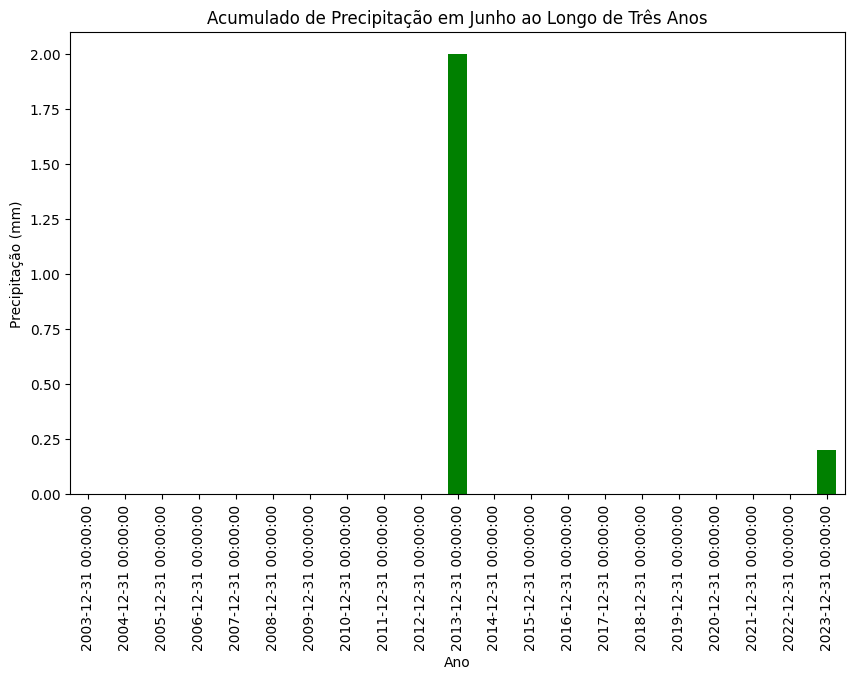

In [25]:
# Tarefa 2: Acumulado de precipitações em junho ao longo de três anos
Mc[Mc.index.month == 6]['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].resample('Y').sum().plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Acumulado de Precipitação em Junho ao Longo de Três Anos')
plt.ylabel('Precipitação (mm)')
plt.xlabel('Ano')
plt.show()


#### Tarefa 3: Média de temperatura de cada dia em março ao longo de três anos

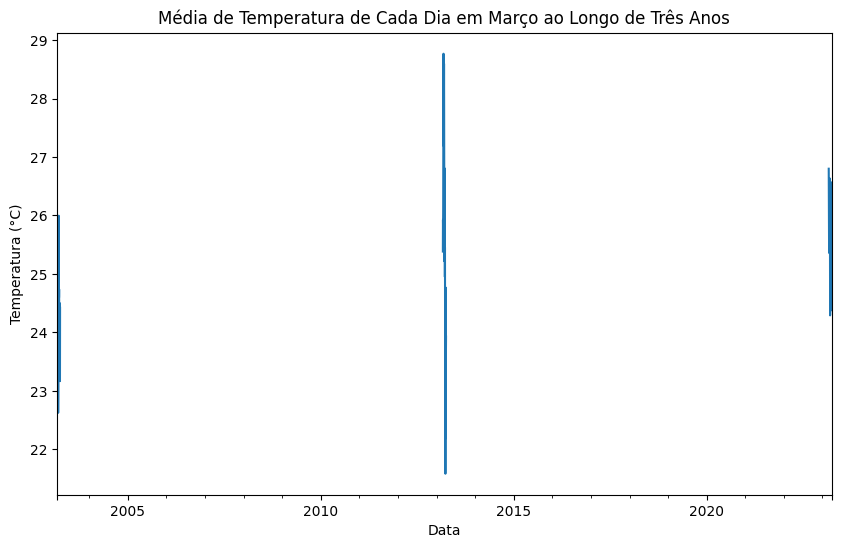

In [29]:
# Tarefa 3: Média de temperatura de cada dia em março ao longo de três anos
Mc[Mc.index.month == 3]['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].resample('D').mean().plot(figsize=(10, 6))
plt.title('Média de Temperatura de Cada Dia em Março ao Longo de Três Anos')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Data')
plt.show()

#### Tarefa 4: Temperaturas máximas e mínimas para cada estação ao longo de três anos

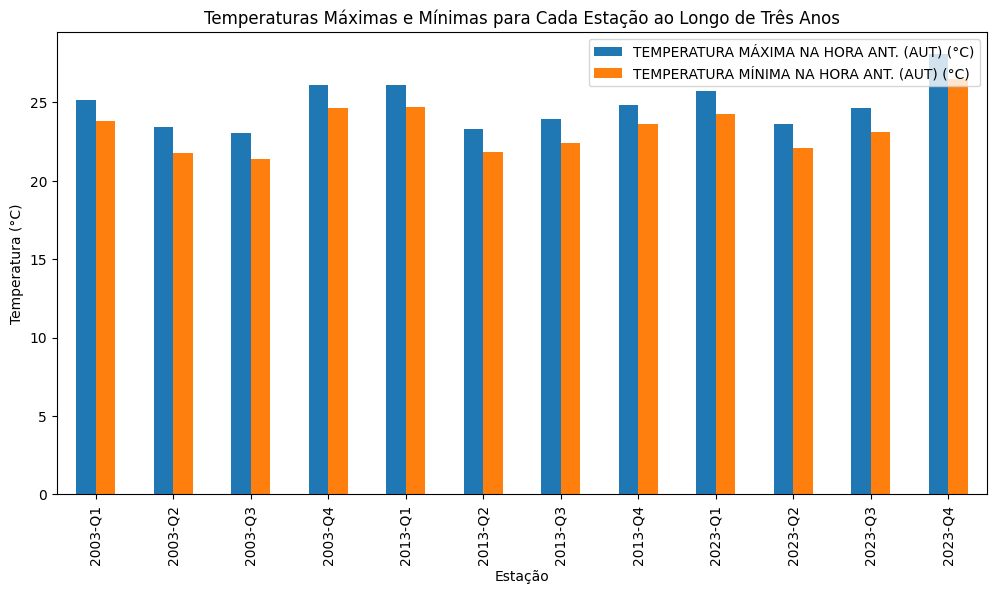

In [27]:
# Tarefa 4: Temperaturas máximas e mínimas para cada estação ao longo de três anos
estacoes = Mc.index.to_period('Q-DEC').strftime('%Y-Q%q')
Mc.groupby(estacoes)[['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)']].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Temperaturas Máximas e Mínimas para Cada Estação ao Longo de Três Anos')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Estação')
plt.show()

#### Tarefa 5: Comportamento da temperatura em 28 de setembro em diferentes intervalos do dia ao longo de três anos

In [ ]:
# Tarefa 5: Comportamento da temperatura em 28 de setembro em diferentes intervalos do dia ao longo de três anos
Mc[Mc.index.month == 9].groupby(Mc.index.hour)['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Comportamento da Temperatura em 28 de Setembro em Diferentes Intervalos do Dia ao Longo de Três Anos')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Hora do Dia')
plt.xticks([0, 1, 2, 3], ['00:00-06:00', '06:00-12:00', '12:00-18:00', '18:00-00:00'], rotation=45)
plt.show()